In [4]:

import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

Collected Female and Male Virgins on Monday 29/01. Staged 3 50/20 Viles for 4h on: Tuesday, Wednesday, Thursday and Friday and counted Pupae.

In [19]:
df = pd.read_excel('/Volumes/lab-windingm/home/users/cochral/plug_camera/staging/Mini_Staging_Experiment.xlsx')


In [20]:
print(df)

   Index  Vile.No Virgin Collection Collection Notes Male Addition  \
0      0        1      Mon 29/01 AM              NaN  Mon 29/11 AM   
1      1        2      Mon 29/11 PM              NaN  Mon 29/11 PM   
2      2        3      Mon 29/11 PM       Higher CO2  Mon 29/11 PM   

  Staging time Time w Males  Pupae Overnight (mon-tue)  1-day-staging  \
0           4h          24h                          2           -3.0   
1           4h        < 24h                          0           -1.0   
2           4h       < 24h                           3            NaN   

   Tuesday Staging  ... 2-day-staging  Wednesday Staging  Time w Males.2  \
0                5  ...          -3.0                102             NaN   
1                0  ...           NaN                 41             NaN   
2                1  ...          -2.0                 59             NaN   

   Pupae Overnight (wed-thur)  3-day-staging Thursday Staging  \
0                       > 500           -4.0            

Pick Columns to Plot

In [21]:
columns_to_plot = ['Pupae Overnight (mon-tue)', 'Tuesday Staging', 'Pupae Overnight (tue-wed)', 'Wednesday Staging', 'Pupae Overnight (wed-thur)', 'Thursday Staging', 'Pupae Overnight (thur-fri)', 'Friday Staging']

Create a new DataFrame by selecting the the 'Vile.No' column

In [34]:
df_new = df[['Vile.No'] + columns_to_plot]



In [35]:
df_new

,Vile.No,Pupae Overnight (mon-tue),Tuesday Staging,Pupae Overnight (tue-wed),Wednesday Staging,Pupae Overnight (wed-thur),Thursday Staging,Pupae Overnight (thur-fri),Friday Staging
0,1,2,5,256,102,> 500,214,> 500,178
1,2,0,0,32,41,> 500,104,> 500,139
2,3,3,1,144,59,> 500,151,> 500,27


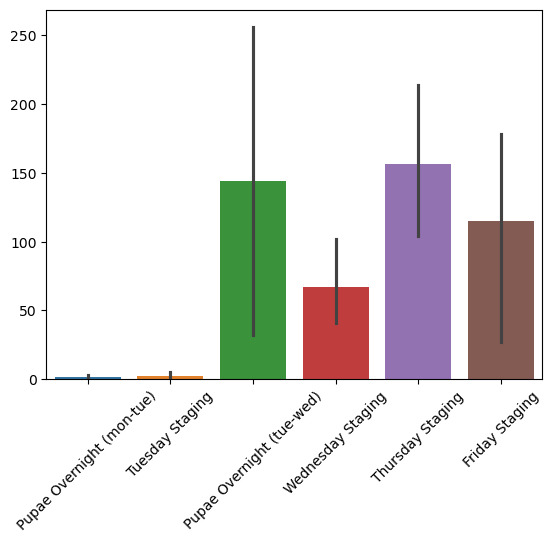

In [29]:
sns.barplot(df_new)

plt.xticks(rotation=45)
plt.show()

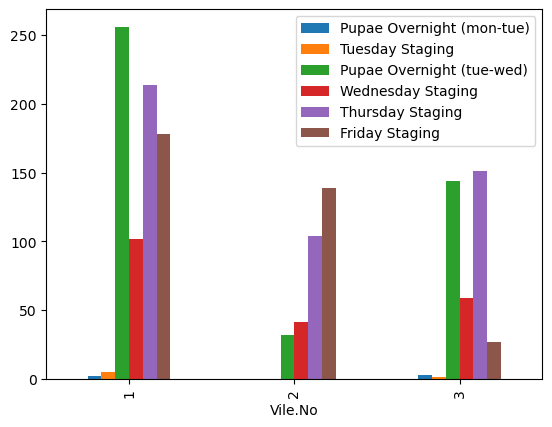

In [30]:
df_new.plot(kind='bar')
plt.show()

So format of dataframe wrong- requires long format?

In [36]:
df_melted = pd.melt(df_new, id_vars='Vile.No', var_name='Category', value_name='Value')

In [37]:
df_melted

,Vile.No,Category,Value
0,1,Pupae Overnight (mon-tue),2
1,2,Pupae Overnight (mon-tue),0
2,3,Pupae Overnight (mon-tue),3
3,1,Tuesday Staging,5
4,2,Tuesday Staging,0
5,3,Tuesday Staging,1
6,1,Pupae Overnight (tue-wed),256
7,2,Pupae Overnight (tue-wed),32
8,3,Pupae Overnight (tue-wed),144
9,1,Wednesday Staging,102


Need to remove > 500 to be able to plot 

In [44]:
# Identify indexes of rows where 'Value' equals '> 500'
indexes_to_drop = df_melted[df_melted['Value'] == '> 500'].index

# Drop these rows from the DataFrame
df_melted.drop(indexes_to_drop, inplace=True)


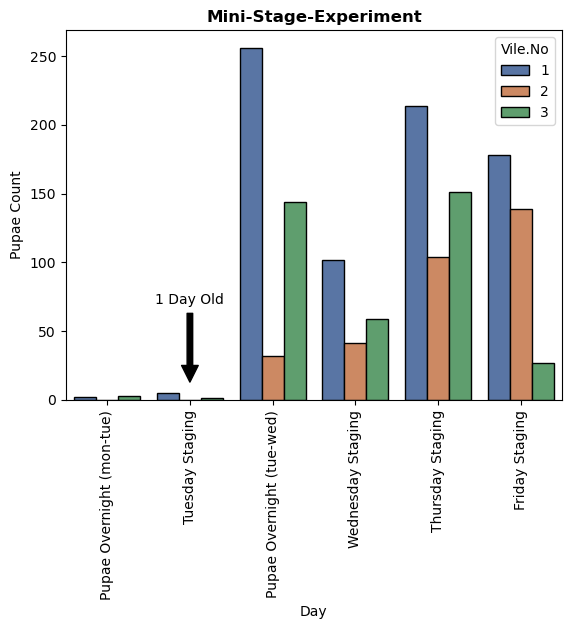

In [72]:
sns.barplot(data=df_melted, x='Category', y='Value', hue='Vile.No', palette='deep', edgecolor='black')
plt.xticks(rotation=90, fontsize=10)
plt.title('Mini-Stage-Experiment', fontweight='bold')
plt.ylabel('Pupae Count')

plt.annotate('1 Day Old', xy=(1, 10), xytext=(1, 70), arrowprops=dict(facecolor='black', shrink=0.05), ha='center')
plt.xlabel('Day')

plt.show()

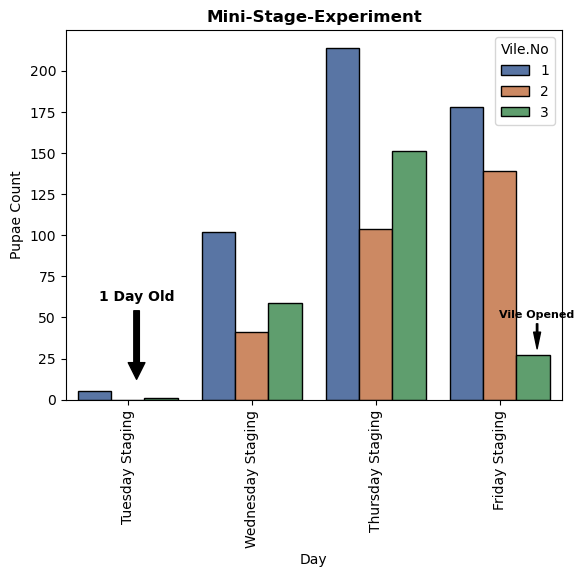

In [101]:


categories_to_plot = ['Tuesday Staging', 'Wednesday Staging', 'Thursday Staging', 'Friday Staging']

# Filter the DataFrame for these categories
filtered_df = df_melted[df_melted['Category'].isin(categories_to_plot)]

# Now plot using seaborn
sns.barplot(data=filtered_df, x='Category', y='Value', hue='Vile.No', palette='deep', edgecolor='black')

plt.xticks(rotation=90, fontsize=10)
plt.title('Mini-Stage-Experiment', fontweight='bold')
plt.ylabel('Pupae Count')

plt.annotate('1 Day Old', xy=(0.07, 10), xytext=(0.07, 60), arrowprops=dict(facecolor='black', shrink=0.05), ha='center', fontweight='bold')

plt.annotate('Vile Opened', xy=(3.3, 30), xytext=(3.3, 50), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5), ha='center', fontweight='bold', fontsize=8)

plt.xlabel('Day')

plt.show()

1 and 2 old are unviable for staging